<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 148.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 197.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 144.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 133.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 130.7 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
# Critical columns
critical_cols = ['Employment', 'JobSat', 'RemoteWork']

# Missing values in critical columns
missing_counts = df[critical_cols].isnull().sum()
missing_percent = df[critical_cols].isnull().mean() * 100

print("Missing values count:\n", missing_counts)
print("\nMissing values percentage:\n", missing_percent)

# Strategy:
# - Missing values < 5%, drop
# - If >= 5%, impute with mode

for col in critical_cols:
    if missing_percent[col] < 5:
        df = df.dropna(subset=[col])
        print(f"Dropped rows with missing values in {col}.")
    else:
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
        print(f"Imputed missing values in {col} with mode: {mode_value}")

# After the impute
print("\nMissing values after handling:\n", df[critical_cols].isnull().sum())

Missing values count:
 Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Missing values percentage:
 Employment     0.000000
JobSat        55.490013
RemoteWork    16.246160
dtype: float64
Dropped rows with missing values in Employment.
Imputed missing values in JobSat with mode: 8.0
Imputed missing values in RemoteWork with mode: Hybrid (some remote, some in-person)

Missing values after handling:
 Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


Median JobSat for each experience range:
ExperienceRange
0-5      8.0
5-10     8.0
10-20    8.0
20+      8.0
Name: JobSat, dtype: float64


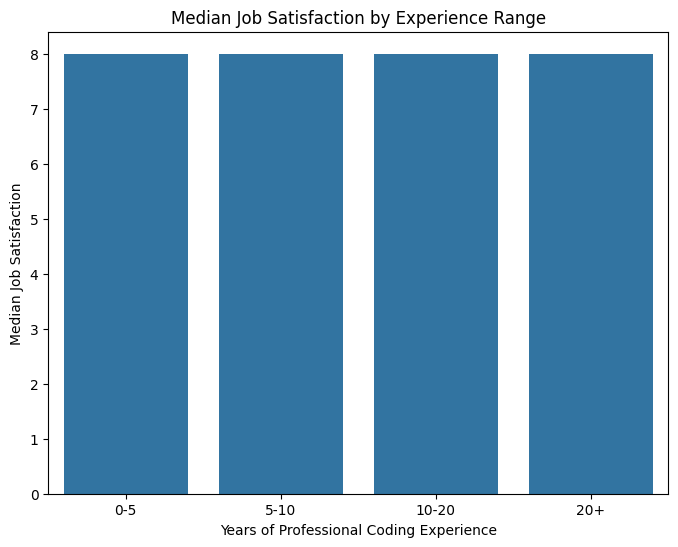

In [5]:
# Checking if YearsCodePro is numeric data
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with missing values in YearsCodePro or JobSat
df = df.dropna(subset=['YearsCodePro', 'JobSat'])

# Create experience ranges
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '20+']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Calculate median JobSat for each experience range
median_job_sat = df.groupby('ExperienceRange', observed=True)['JobSat'].median()

print("Median JobSat for each experience range:")
print(median_job_sat)

# Visualize with a bar plot
plt.figure(figsize=(8,6))
sns.barplot(x=median_job_sat.index, y=median_job_sat.values)
plt.title('Median Job Satisfaction by Experience Range')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


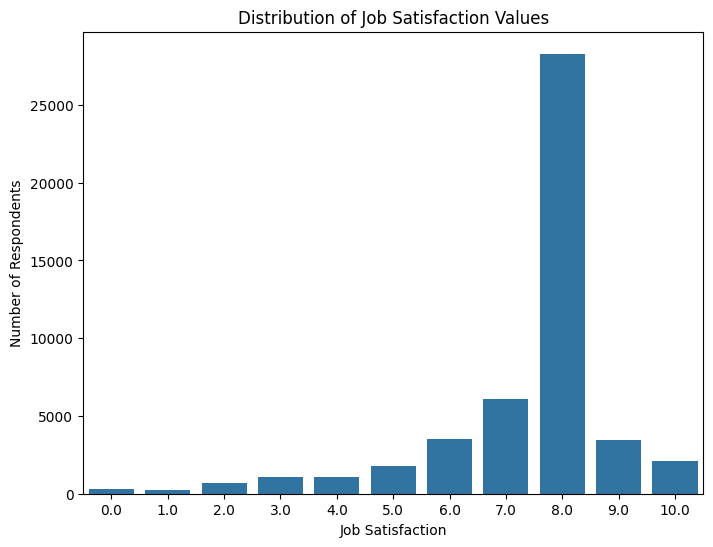

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x='JobSat', data=df)
plt.title('Distribution of Job Satisfaction Values')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


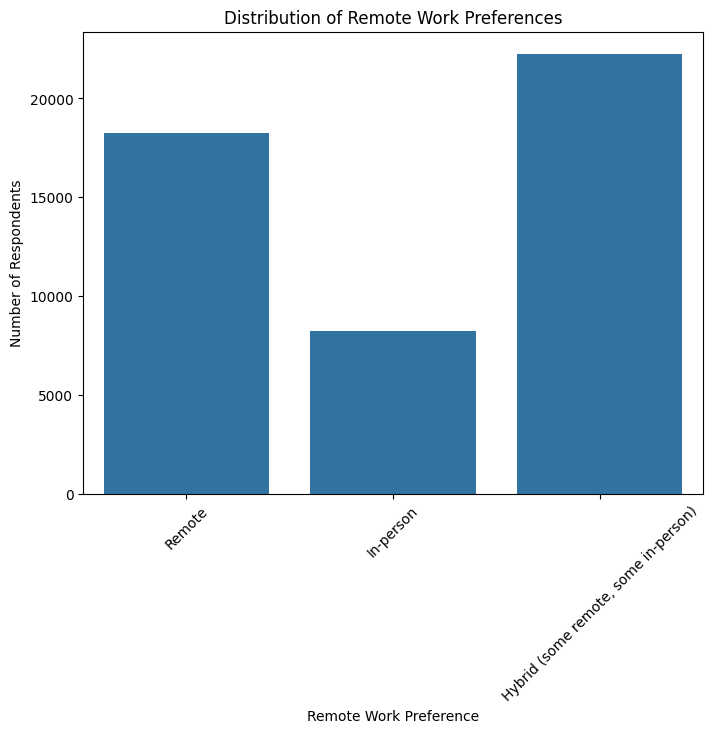


Remote Work Preferences by Employment Type:
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                15178   
Employed, full-time;Employed, part-time                                               72   
Employed, full-time;Independent contractor, fre...                                  1175   
Employed, full-time;Independent contractor, fre...                                    67   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                     2   
Student, full-time;Student, part-time;Retired                                          1   
Student, part-time                 

In [10]:
# Count plot: RemoteWork distribution
plt.figure(figsize=(8,6))
sns.countplot(x='RemoteWork', data=df)
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

# Cross-tabulation: RemoteWork vs Employment type
remotework_employment_ct = pd.crosstab(df['Employment'], df['RemoteWork'])
print("\nRemote Work Preferences by Employment Type:")
print(remotework_employment_ct)

# Cross-tabulation: RemoteWork vs DevType (job roles)
# First, check if DevType column exists in your dataset
if 'DevType' in df.columns:
    remotework_devtype_ct = pd.crosstab(df['DevType'], df['RemoteWork'])
    print("\nRemote Work Preferences by Job Role (DevType):")
    print(remotework_devtype_ct)
else:
    print("\nDevType column not found in the dataset.")

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


Top programming languages in United States of America:
LanguageHaveWorkedWith
JavaScript                 5725
SQL                        5138
Python                     5067
HTML/CSS                   4684
Bash/Shell (all shells)    4080
TypeScript                 3678
C#                         2715
Java                       2304
C++                        1962
C                          1646
Name: count, dtype: int64


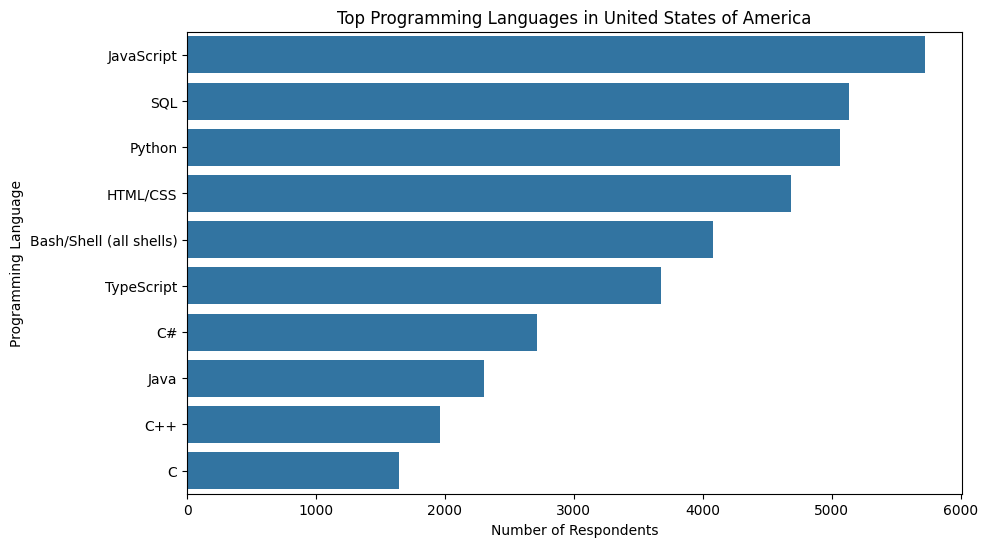

In [11]:
# For 'United States of America'
region = 'United States of America'
df_region = df[df['Country'] == region]

# LanguageHaveWorkedWith column
languages_series = df_region['LanguageHaveWorkedWith'].dropna().str.split(';').explode()

# Count top programming languages
language_counts = languages_series.value_counts()

print(f"Top programming languages in {region}:")
print(language_counts.head(10))

# Visualize with bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=language_counts.head(10).values, y=language_counts.head(10).index)
plt.title(f'Top Programming Languages in {region}')
plt.xlabel('Number of Respondents')
plt.ylabel('Programming Language')
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


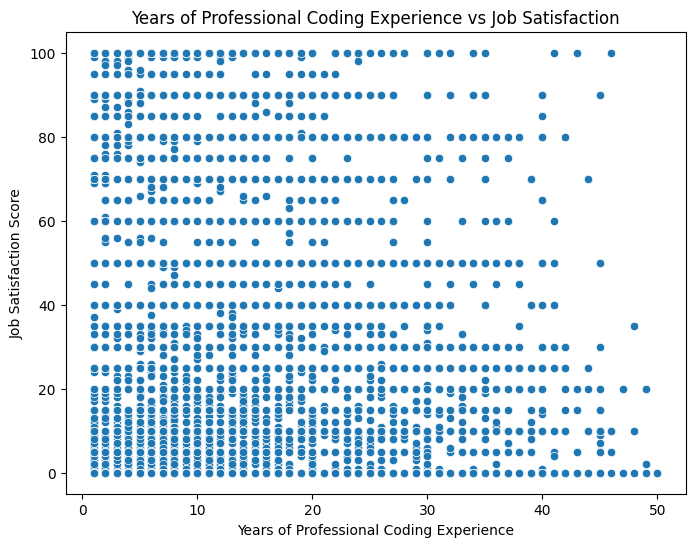

In [12]:
# Ensure YearsCodePro and JobSatPoints_1 are numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# Drop rows with missing values in these columns
df_filtered = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='YearsCodePro', y='JobSatPoints_1', data=df_filtered)
plt.title('Years of Professional Coding Experience vs Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Cross-tabulation of Top 5 EdLevel and Top 5 Employment:
Employment                                          Employed, full-time  \
EdLevel                                                                   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      15664   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   10261   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     1924   
Secondary school (e.g. American high school, Ge...                 1281   
Some college/university study without earning a...                 3286   

Employment                                          Employed, full-time;Independent contractor, freelancer, or self-employed  \
EdLevel                                                                                                                        
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                                     1326                          
Master’s degree (M.A., M.S., M.Eng

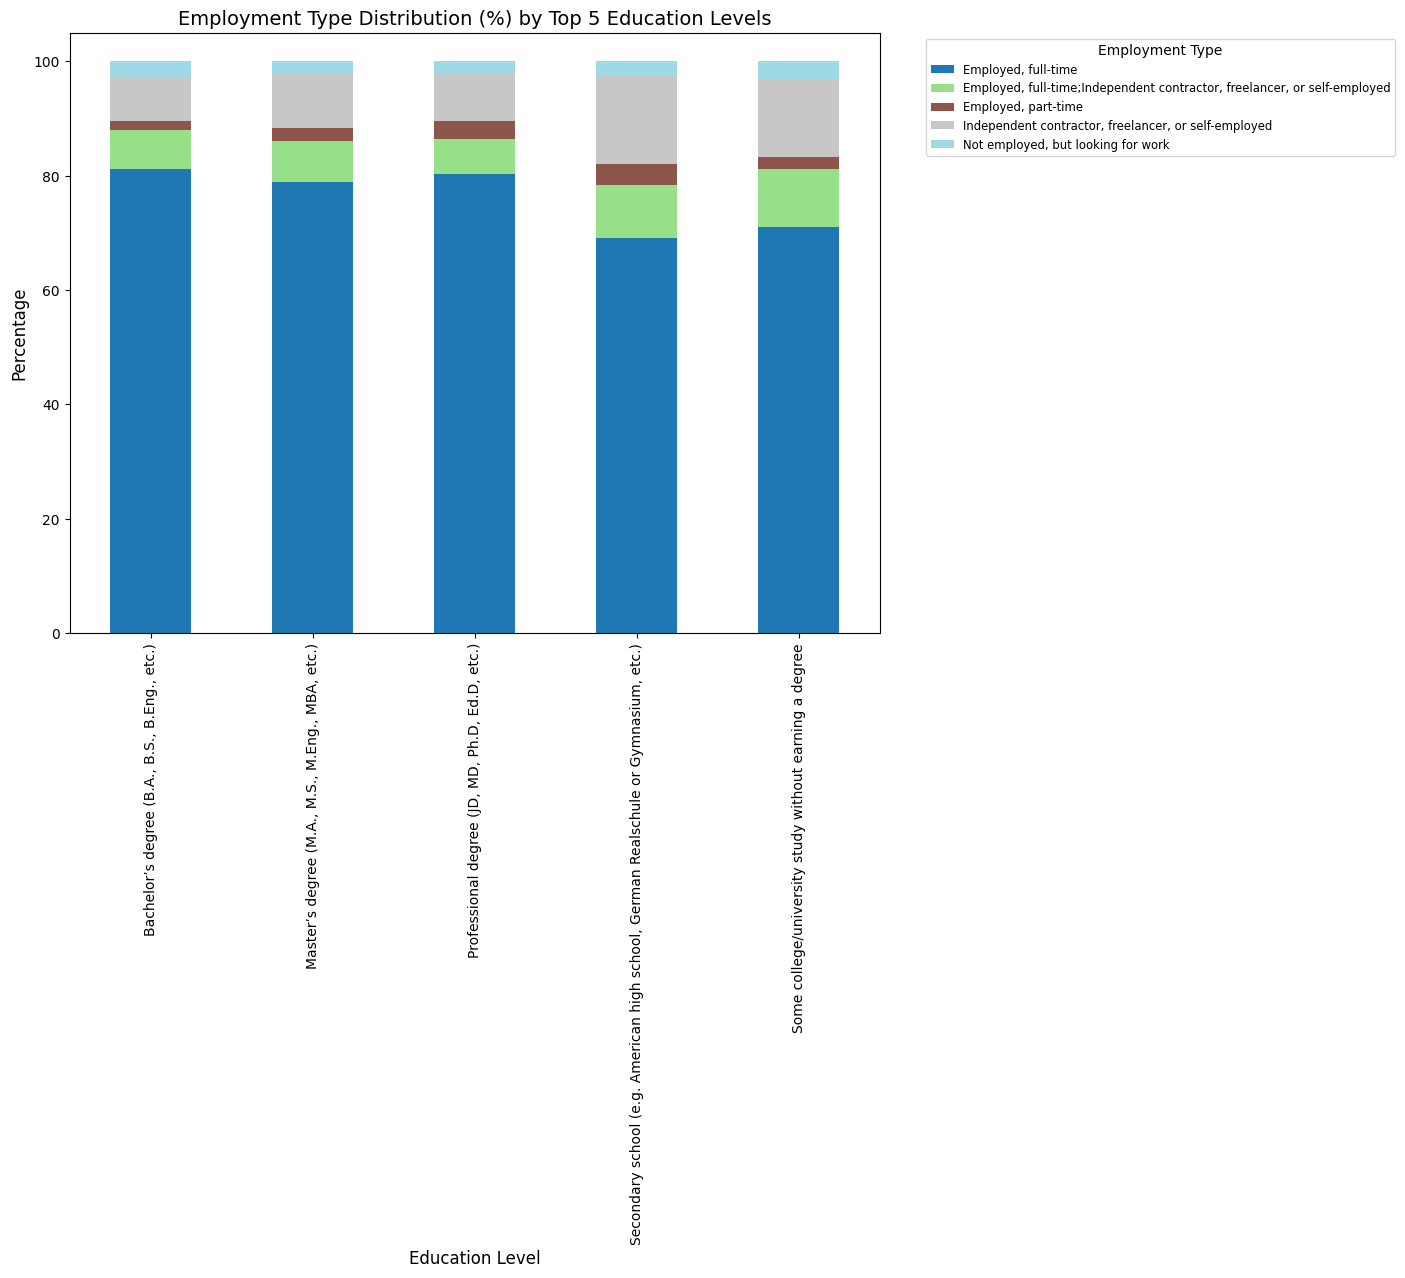

In [18]:
# Top 5 Education Level and Employment type
top_edlevels = df['EdLevel'].value_counts().head(5).index
top_employment = df['Employment'].value_counts().head(5).index

# Top categories
df_filtered = df[df['EdLevel'].isin(top_edlevels) & df['Employment'].isin(top_employment)]

# Cross-tabulation
edlevel_employment_ct = pd.crosstab(df_filtered['EdLevel'], df_filtered['Employment'])

print("Cross-tabulation of Top 5 EdLevel and Top 5 Employment:")
print(edlevel_employment_ct)

# Normalized crosstab: percentage distribution
edlevel_employment_pct = edlevel_employment_ct.div(edlevel_employment_ct.sum(axis=1), axis=0) * 100

# Stacked bar chart visualization
ax = edlevel_employment_pct.plot(kind='bar', stacked=True, figsize=(12,8), colormap='tab20')
plt.title('Employment Type Distribution (%) by Top 5 Education Levels', fontsize=14)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Education Level', fontsize=12)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Subplots adjust
plt.subplots_adjust(bottom=0.15, top=0.9, right=0.8)

plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [19]:
output_path = 'survey-data-cleaned.csv'
df.to_csv(output_path, index=False)

print(f"Modified dataset saved as '{output_path}'.")

Modified dataset saved as 'survey-data-cleaned.csv'.


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
